<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/20.00.Aula-Cenario_Rio.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- O cenário de múltiplos do Pop350: parâmetros](19.00.Aula-Construindo_Cenarios_e_Pop_Multi_350_parametros.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Modelo individual: incluindo incubação e latência ->](21.00.Aula-Modelo_individual_infeccao_e_recuperacao.ipynb)

---


# O cenário da cidade do Rio de Janeiro

- Continuando a criação de cenários que sejam **múltiplos** do cenário `Pop350` visto anteriormente.

- Neste segundo caderno da série, ...

In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [3]:
sns.set_style("darkgrid")

In [4]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 01/Jun/2020


## Distribuição populacional da cidade do Rio de Janeiro

### Carregando os dados

Os dados populacionais por quilômetro quadrado da cidade do Rio de Janeiro foram obtidos pelo [Landscan](https://landscan.ornl.gov).

In [5]:
dados = np.load('../input/landscan/landscan_rio.npy')

In [6]:
print(f'Mínimo: {dados.min()}')
print(f'Máximo: {dados.max()}')
print(f'Média: {dados.mean():.2f}')
print(f'Total: {dados.sum():.2f}')
print(f'Menor valor positivo: {dados[dados>0].min()}')
print(f'Blocos vazios: {len(dados[dados==0])}')
print(f'Blocos negativos: {len(dados[dados<0])}')
print(f'Dimensão 0: {dados.shape[0]}')
print(f'Dimensão 1: {dados.shape[1]}')
print(f'Número de blocos: {dados.shape[0]*dados.shape[1]}')

Mínimo: -1.0
Máximo: 55124.0
Média: 2118.57
Total: 6857814.00
Menor valor positivo: 1.0
Blocos vazios: 1727
Blocos negativos: 39
Dimensão 0: 39
Dimensão 1: 83
Número de blocos: 3237


### Visualização

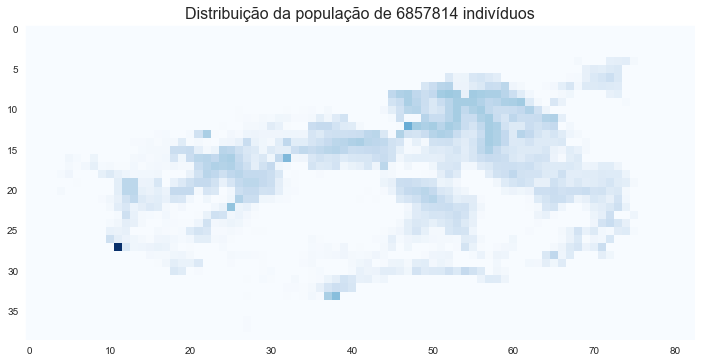

In [7]:
plt.figure(figsize=(12,6))
plt.imshow(dados, cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(dados.sum())} indivíduos', fontsize=16)
plt.show()

Em outro esquema de cores para destacar valores extremos e médios

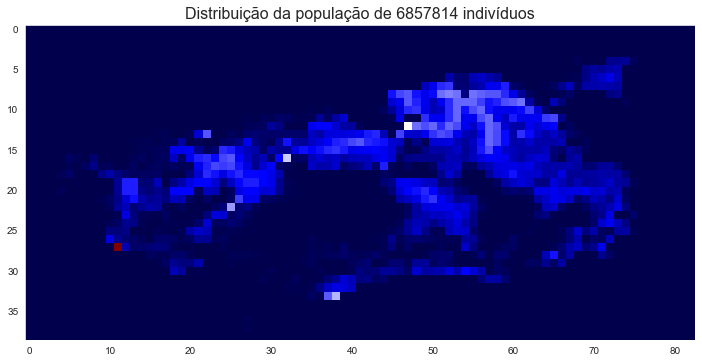

In [8]:
plt.figure(figsize=(12,6))
plt.imshow(dados, cmap='seismic', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(dados.sum())} indivíduos', fontsize=16)
plt.show()

### Valor destoante

O ponto vermelho no mapa é suspeito. Ele certamente é o bloco de valor máximo 55.124. Os blocos brancos devem estar próximos da metade, em torno de 27 mil. Os blocos azulados estão abaixo deste. Vejamos os blocos que ficam acima de 20 mil:

In [9]:
print(f'Populações dos blocos com mais de 20 mil pessoas: {dados[dados>20000]}')

Populações dos blocos com mais de 20 mil pessoas: [20720. 27626. 24812. 22101. 55124. 23667.]


São apenas 6 blocos, sendo que apenas 2 têm mais de 25 mil, dentre eles o de 55.124, uma diferença enorme.

Uma busca nos revela a posição do bloco de máximo:

In [10]:
dados[27,11]

55124.0

In [11]:
dados_truncados = np.minimum(dados, dados[dados>25000].min())

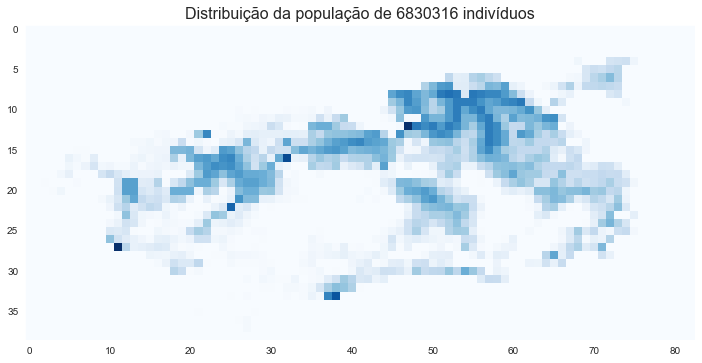

In [12]:
plt.figure(figsize=(12,6))
plt.imshow(dados_truncados, cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(dados_truncados.sum())} indivíduos', fontsize=16)
plt.show()

### Zerando os valores negativos

In [13]:
dados = np.maximum(dados, 0)

### Visualização em escala logarítmica

Visualizamos 

$$ ln( 1 + \textrm{população})
$$

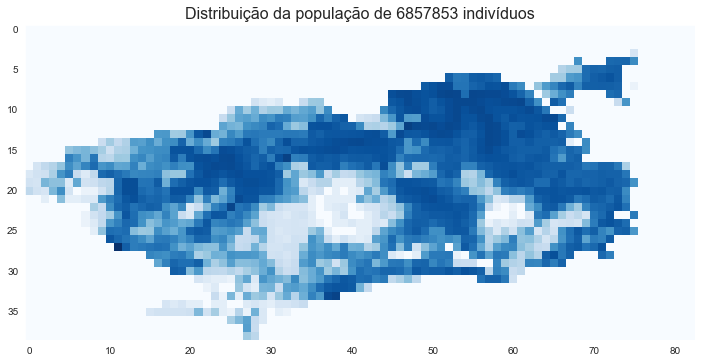

In [14]:
plt.figure(figsize=(12,6))
plt.imshow(np.log(1 + dados), cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(dados.sum())} indivíduos', fontsize=16)
plt.show()

## Rede residencial

In [15]:
censo_residencial = np.array([.21, .26, .20, .17, .08, .04, .02, 0.02])

In [16]:
pop_por_blocos = (dados/100).astype(int)

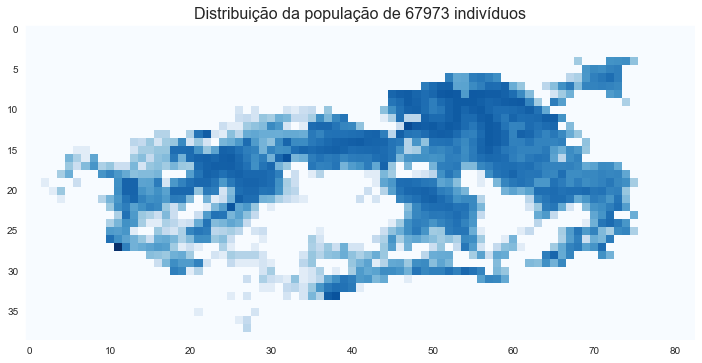

In [17]:
plt.figure(figsize=(12,6))
plt.imshow(np.log(1 + pop_por_blocos), cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(pop_por_blocos.sum())} indivíduos', fontsize=16)
plt.show()

In [18]:
pos_residencias, pos_individuos, res_individuos \
    = episiming.cenarios.aloca_residencias_e_individuos(pop_por_blocos, censo_residencial)

In [19]:
attrib_pos_individuos = {j: pos_individuos[j] for j in range(len(pos_individuos))}

G_r = nx.random_geometric_graph(len(pop_por_blocos), 0, pos=attrib_pos_individuos)

for individuos in res_individuos:
    if len(individuos) > 1:
        G_r.add_edges_from([(i,j) for i in individuos for j in individuos if i < j])

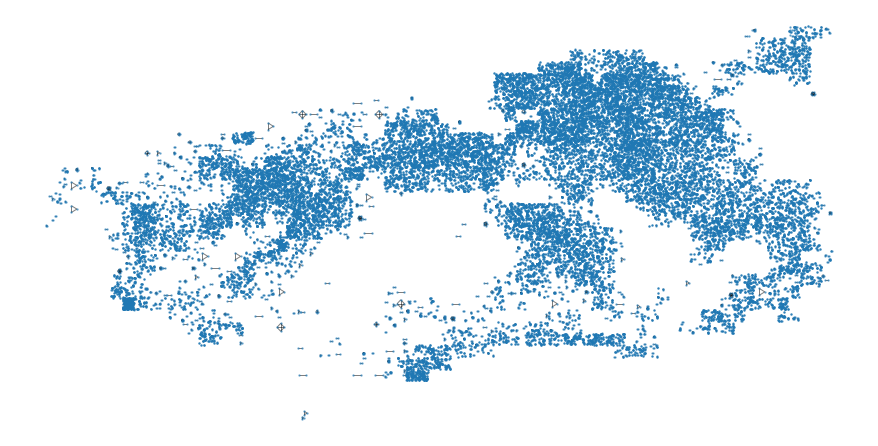

In [20]:
plt.figure(figsize=(12,6))
nx.draw(G_r, pos=attrib_pos_individuos, node_size=2, alpha=0.5)
plt.show()

<!--NAVIGATOR-->

---
[<- O cenário de múltiplos do Pop350: parâmetros](19.00.Aula-Construindo_Cenarios_e_Pop_Multi_350_parametros.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Modelo individual: incluindo incubação e latência ->](21.00.Aula-Modelo_individual_infeccao_e_recuperacao.ipynb)